## 응답 데이터 정보
- basJDt : 기준일자
- crno : 법인등록번호
- bizYear : 사업연도
- fnclDcd : 재무제표구분코드
- acitId : 계정과목 ID
- acitNm : 계정과목명
- thqrAcitAmt : 당분기계정과목금액
- crtmAcitAmt : 당기계정과목금액
- lsqtAcitAmt : 전분기계정과목금액
- pvtrAcitAmt : 전기계정과목금액
- bpvtrAcitAmt : 전전기계정과목금액
- curCd : 통화 코드

In [68]:
# financial_ss.csv 파일을 읽어서 DataFrame에 저장
import pandas as pd
import numpy as np

df = pd.read_csv('financial_ss.csv')
# df.info()
df.head()
# => 첫번째 컬럼 데이터가 인덱스로서 사용되는 값으로 확인

df = pd.read_csv('financial_ss.csv', index_col=0)
df.head()
# => index_col=0 : 첫번째 데이터(위치)를 인덱스로 선택

,basDt,crno,bizYear,fnclDcd,fnclDcdNm,acitId,acitNm,thqrAcitAmt,crtmAcitAmt,lsqtAcitAmt,pvtrAcitAmt,bpvtrAcitAmt,curCd
0,20151231,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Assets,자산총계,0,242179521000000,0,230422958000000,214075018000000,KRW
1,20151231,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentAssets,유동자산,0,124814725000000,0,115146026000000,110760271000000,KRW
2,20151231,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentLiabilities,유동부채,0,50502909000000,0,52013913000000,51315409000000,KRW
3,20151231,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Equity,자본총계,0,179059805000000,0,168088188000000,150016010000000,KRW
4,20151231,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Liabilities,부채총계,0,63119716000000,0,62334770000000,64059008000000,KRW


In [69]:
# 컬럼별 데이터 타입 => dypes
df.dtypes

# '기준일자' 컬럼(basDt) 타입을 Datetime으로 변경
# pd.to_datetime() => '대상' 숫자 타입인 경우
df['basDt'] = pd.to_datetime(df['basDt'], format='%Y%m%d')
print(df['basDt'])



0     2015-12-31
1     2015-12-31
2     2015-12-31
3     2015-12-31
4     2015-12-31
         ...    
167   2024-12-31
168   2024-12-31
169   2024-12-31
170   2024-12-31
171   2024-12-31
Name: basDt, Length: 172, dtype: datetime64[ns]


In [70]:
# 재무제표구분코드명(fnclJDcdNm) 컬럼의 고유값 목록 확인
df['fnclDcdNm'].unique()

# 위 컬럼 데이터 중 연결재무제표 데이터만 선택
# * contains 함수 사용
df[df['fnclDcdNm'].str.contains('연결재무제표')]

# * [member] 제거하고, 공백 제거하여 '연경재무재표' 선택
df['fnclDcdNm_main'] = df['fnclDcdNm'].str.replace('[member]', '').str.strip()
df = df[df['fnclDcdNm_main'] == '연결재무제표']
df

,basDt,crno,bizYear,fnclDcd,fnclDcdNm,acitId,acitNm,thqrAcitAmt,crtmAcitAmt,lsqtAcitAmt,pvtrAcitAmt,bpvtrAcitAmt,curCd,fnclDcdNm_main
0,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Assets,자산총계,0,242179521000000,0,230422958000000,214075018000000,KRW,연결재무제표
1,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentAssets,유동자산,0,124814725000000,0,115146026000000,110760271000000,KRW,연결재무제표
2,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_CurrentLiabilities,유동부채,0,50502909000000,0,52013913000000,51315409000000,KRW,연결재무제표
3,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Equity,자본총계,0,179059805000000,0,168088188000000,150016010000000,KRW,연결재무제표
4,2015-12-31,1301110006246,2015,FS_ifrs_ConsolidatedMember,연결재무제표 [member],ifrs_Liabilities,부채총계,0,63119716000000,0,62334770000000,64059008000000,KRW,연결재무제표
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2024-12-31,1301110006246,2024,FS_ifrs-full_ConsolidatedMember,연결재무제표 [member],ifrs-full_IssuedCapital,자본금,0,897514000000,0,897514000000,897514000000,KRW,연결재무제표
160,2024-12-31,1301110006246,2024,FS_ifrs-full_ConsolidatedMember,연결재무제표 [member],ifrs-full_Liabilities,부채총계,0,112339878000000,0,92228115000000,93674903000000,KRW,연결재무제표
161,2024-12-31,1301110006246,2024,FS_ifrs-full_ConsolidatedMember,연결재무제표 [member],ifrs-full_NoncurrentAssets,비유동자산,0,287469682000000,0,259969423000000,229953926000000,KRW,연결재무제표
162,2024-12-31,1301110006246,2024,FS_ifrs-full_ConsolidatedMember,연결재무제표 [member],ifrs-full_NoncurrentLiabilities,비유동부채,0,19013579000000,0,16508663000000,15330051000000,KRW,연결재무제표


In [71]:
# 기준일자 컬럼 기준으로 오름차순 정렬. 인덱스행 초기화.
df = df.sort_values(by='basDt', ascending=True).reset_index(drop=True)

In [72]:
# 계정과목명(acitNm) 컬럼의 고유값 확인
df['acitNm'].unique()

array(['자산총계', '유동자산', '유동부채', '자본총계', '부채총계', '비유동자산', '비유동부채',
       '이익잉여금(결손금)', '자본금', '이익잉여금'], dtype=object)

([<matplotlib.patches.Wedge at 0x1c7f2e8e5d0>,
 [Text(0.785563278116679, 0.8398751907721632, '부채총계'),
  Text(-0.7514084264010633, -0.8033588094578151, '자본총계')],
 [Text(0.4440140267616011, 0.4747120643494835, '26.1%'),
  Text(-0.4098591416733072, -0.4381957142497173, '73.9%')])

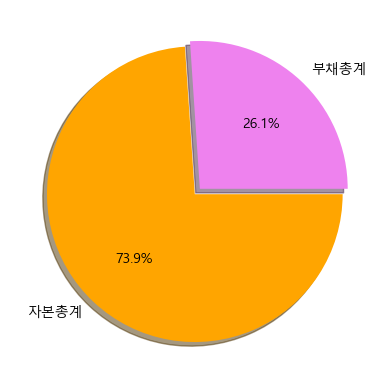

In [73]:
# 계정과목이 '부채총계', '자본총계'인 데이터의 당기계정과목금액(crtmjAcitAmt) 시각화
# '부채총계'
acit_0 = df[df['acitNm'] == '부채총계']
acit_0_amt = acit_0['crtmAcitAmt']

data0 = acit_0_amt.iloc[0]

# '자본총계'
data1 = df[df['acitNm'] == '자본총계']['crtmAcitAmt'].iloc[0]

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

plt.figure()
plt.pie([data0, data1], labels=['부채총계', '자본총계'], autopct='%1.1f%%',  colors=['violet', 'orange'], explode=(0.05, 0), shadow=True)

([<matplotlib.patches.Wedge at 0x1c7f2eedb10>,
 [Text(-0.6394951151682008, 0.9557960021238893, '부채총계'),
  Text(0.6116912776231642, -0.9142394548911906, '자본총계')],
 [Text(-0.3614537607472439, 0.5402325229395896, '68.8%'),
  Text(0.33364978779445315, -0.49867606630428574, '31.2%')])

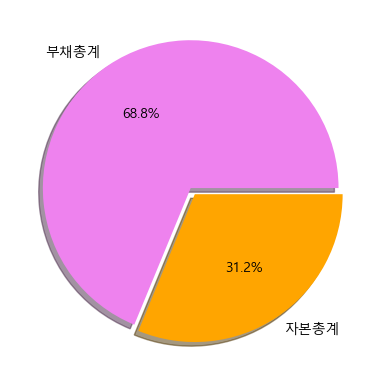

In [74]:
# 부채 총계, 자본 총계 -- 당기금액 총합을 시각화
data2 = df[df['acitNm'] == '자본총계']['crtmAcitAmt'].sum()
data3 = df[df['acitNm'] == '부채총계']['crtmAcitAmt'].sum()

plt.rc('font', family='Malgun Gothic')

plt.figure()
plt.pie([data2, data3], labels=['부채총계', '자본총계'], autopct='%1.1f%%',  colors=['violet', 'orange'], explode=(0.05, 0), shadow=True)

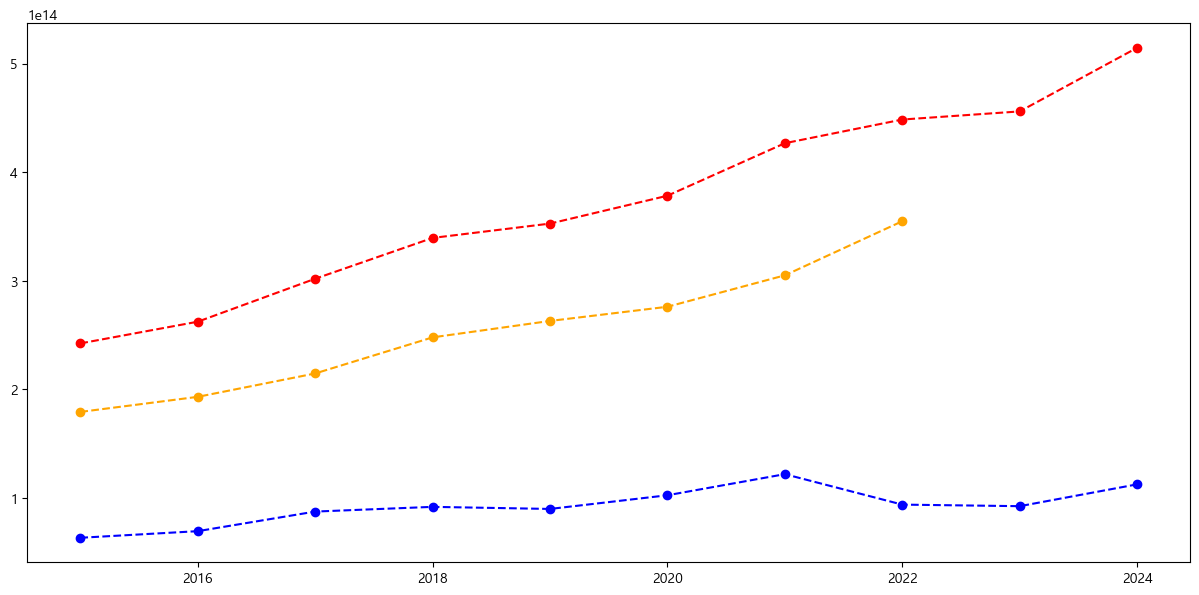

In [93]:
# '자산 총계'의 당기 금액을 연도별로 시각화
data = df[df['acitNm'] == '자산총계'].groupby('bizYear')['crtmAcitAmt'].sum()

data2 = df[df['acitNm'] == '자본총계'].groupby('bizYear')['crtmAcitAmt'].sum()
data3 = df[df['acitNm'] == '부채총계'].groupby('bizYear')['crtmAcitAmt'].sum()

plt.figure(figsize=(15, 7))

# line, bar
plt.plot(data, marker='o', linestyle='--', color='red')
# plt.bar(x=data.index, height=data)
plt.plot(data2, marker='o', linestyle='--', color='orange')
plt.plot(data3, marker='o', linestyle='--', color='blue')